# BACKGROUND

Credit default is a risk that must be minimized in the Banking institution because the more credit default are, the greater the loss reserves that must be formed by the Bank to be able to cover these credit default, so that it will have an impact on the Bank's profit and loss.
Therefore, the Bank needs to mitigate the risk of credit default. By predicting it, the mitigation will be more effective and efficient.


# OBJECTIVE

The purpose of this project is to create a credit default prediction model so that the Bank can do early risk mitigation.

# PROBLEM STATEMENT

Goal: Model able to predict credit default

Research Question: How to predict credit default?             
Several classification models will be used to predict credit default, because the objective to be achieved from this project is "whether a credit from a customer will be default or not"? The selected classification model is the model that has the highest evaluation score.


# METHODOLOGY AND DATA

## METHODOLOGY

To be able to achieve the desired goal, the following things are carried out:
1. Perform data cleaning of the dataset
2. Explore data to understand problems and gain insight as a basis for providing recommendations for problem solutions
3. Create a simple baseline model as a comparison to the results of other models
4. Improve the baseline model by tuning parameter to see if there is an increase in the evaluation model
5. Choose the model with the highest evaluation score, interpret it and simulate the potential impact based on that model
6. Business Recommendations

## DATA

Dataset source : https://www.kaggle.com/datasets/laotse/credit-risk-dataset

Working age start from 15 - 64 years old, so the maximum working experience is  49 years, source:   
https://data.oecd.org/pop/working-age-population.htm#:~:text=The%20working%20age%20population%20is%20defined%20as%20those%20aged%2015%20to%2064.

In [ ]:
!pip install treeinterpreter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install waterfallcharts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 1. IMPORT PACKAGES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from imblearn import over_sampling
from imblearn.over_sampling import SMOTE 

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


# 2. LOADING DATASET

In [ ]:
df = pd.read_csv('credit_risk_dataset.csv')
df.head(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df.shape

(32581, 12)

# 3. DATA CLEANSING

At this step, control will be carried out on missing values ​​and duplicated values

## 3.1 MISSING VALUE HANDLING 

### 3.1.1 MISSING VALUE CHECK 

In [ ]:
def missing_value_check (df) :
    null_number = (df.isnull().sum()/len(df))*100
    return null_number.sort_values(ascending = False)
missing_value_check(df)

loan_int_rate                 9.563856
person_emp_length             2.747000
person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

Action:
1. The missing value in the person_emp_length feature will be dropped because the value is not significant to the dataset
2. The missing value in the loan_int_rate feature will be imputed using mean

### 3.1.2 MISSING VALUE ACTION 

In [ ]:
# Drop missing value on person_emp_length feature:
df_n = df[df['person_emp_length'].notna()]
df_n.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3048
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
# Impute missing value on loan_int_rate feature with mean :
df_n = df_n.fillna(df_n['loan_int_rate'].mean())
df_n.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

There are no more missing value on dataset

## 3.2 DUPLICATED VALUE HANDLING

### 3.2.1 DUPLICATED VALUE CHECK 

In [ ]:
df_n.duplicated().sum()

157

### 3.2.2 DUPLICATED VALUE ACTION 

Drop duplicated value :

In [ ]:
df_n = df_n.drop_duplicates()
df_n.duplicated().sum()

0

There are no more duplicated value on dataset

In [ ]:
# Check new shape on dataset
df_n.shape

(31529, 12)

# 4. EDA

## 4.1 Split Dataset 

In [ ]:
# Numerical Data
list_category = list(df_n.select_dtypes(include = [object]).columns)
df_category = df_n[list_category]

# Categorical Data
list_number = list(df_n.select_dtypes(include = [int,float]).columns)
df_number = df_n[list_number]

## 4.1.1 Numerical Data

In [ ]:
df_number.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,31529.0,27.759238,6.366137,20.00,23.00,26.000000,30.00,144.00
person_income,31529.0,66704.465254,62457.558022,4000.00,39456.00,56000.000000,80000.00,6000000.00
person_emp_length,31529.0,4.790510,4.145490,0.00,2.00,4.000000,7.00,123.00
loan_amnt,31529.0,9665.152717,6336.661842,500.00,5000.00,8000.000000,12500.00,35000.00
loan_int_rate,31529.0,11.044855,3.071690,5.42,8.49,11.039867,13.16,23.22
loan_status,31529.0,0.215928,0.411471,0.00,0.00,0.000000,0.00,1.00
loan_percent_income,31529.0,0.169660,0.106324,0.00,0.09,0.150000,0.23,0.83
cb_person_cred_hist_length,31529.0,5.816201,4.064782,2.00,3.00,4.000000,8.00,30.00


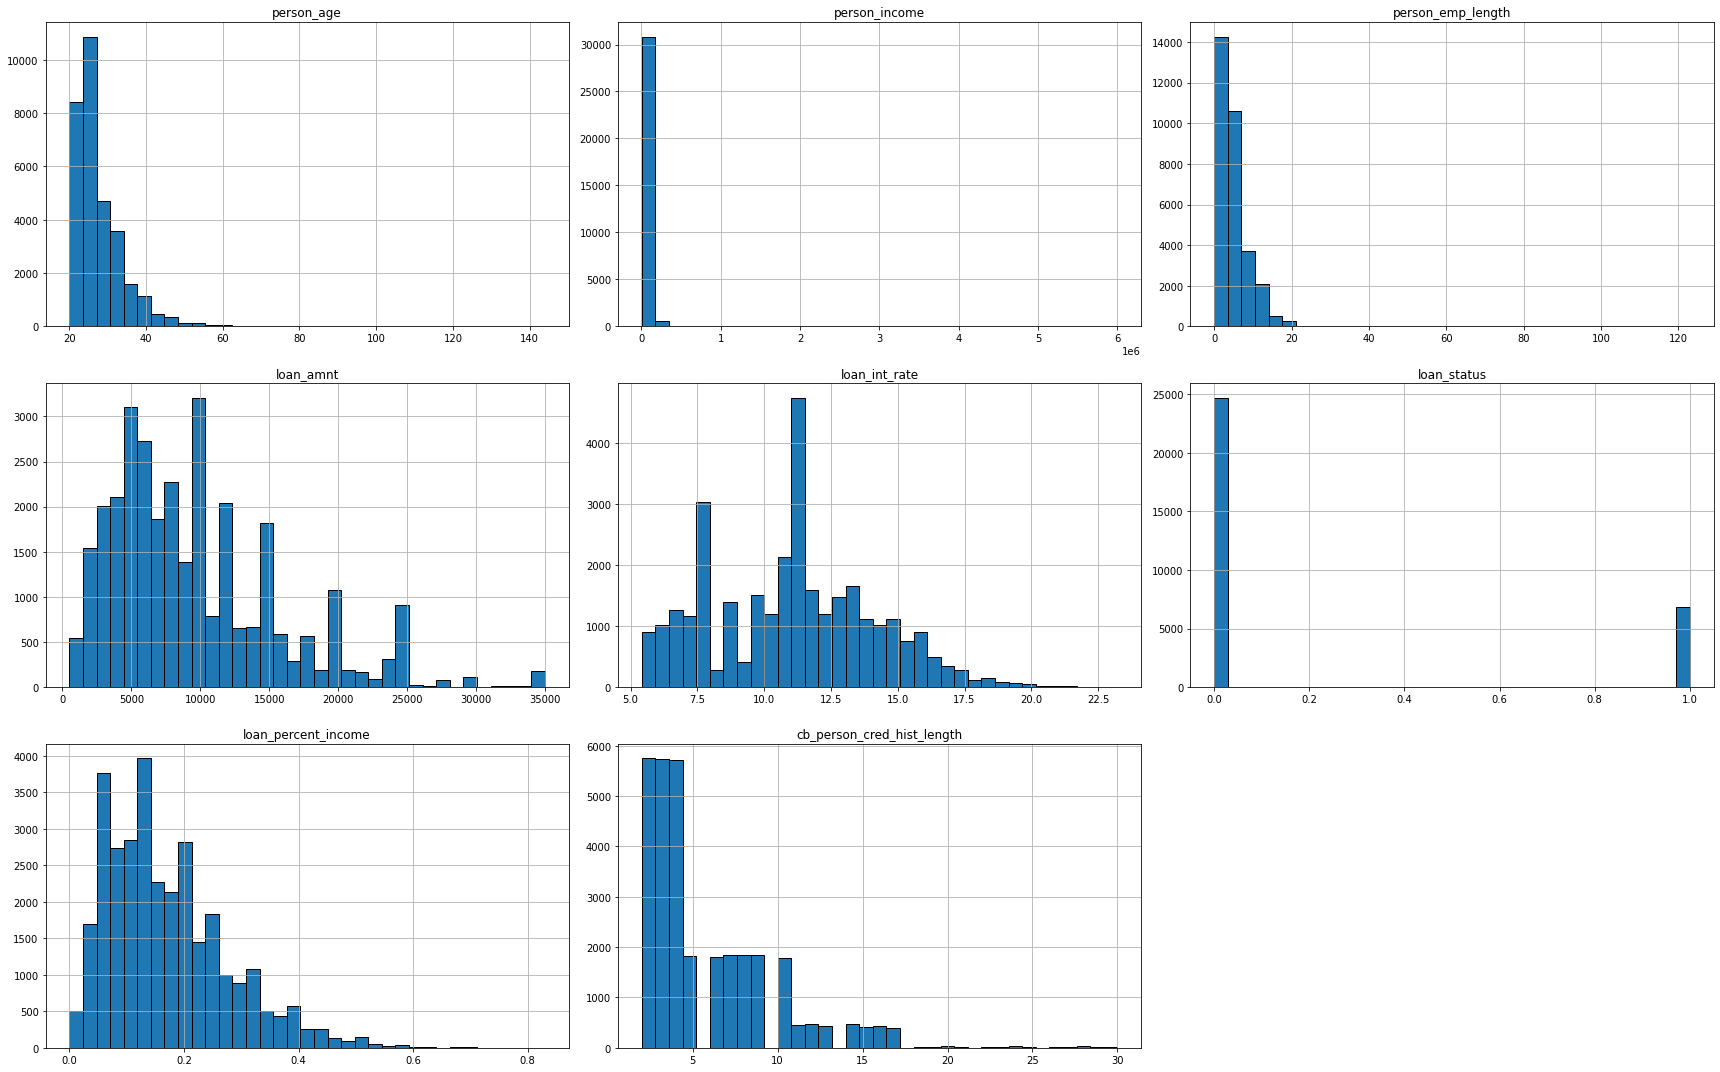

In [ ]:
df_number.hist(bins=35, figsize=(24, 15), layout=(-1, 3), edgecolor="black")
plt.tight_layout()

Observations:    
1. There are discrepancies in the maximum value in the person_age, person_income and person_emp_length features because the maximum value of each feature is too far from the average value
2. The average customer income is 66,074 per year
3. The average customer works it has been for 5 years
4. The average number of customer loans is 9,589
5. The average interest rate on customer loans is 11% per year
6. The average number of customer loans is 17% of customer income per year
7. The average customer have credit history that has been running for 6 months

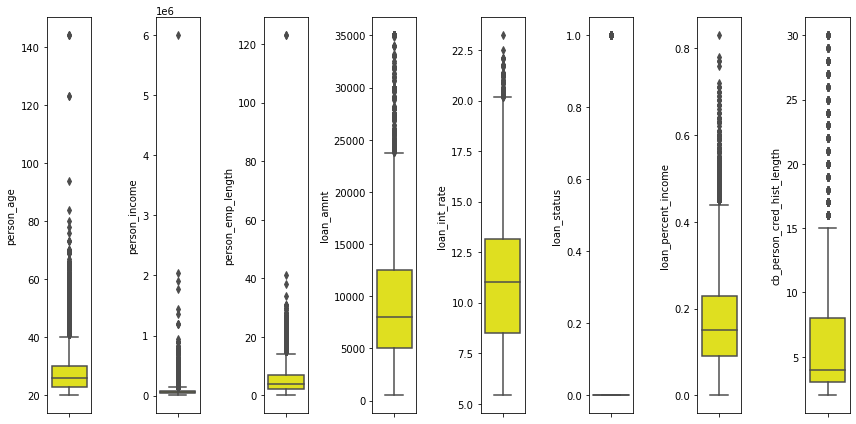

In [ ]:
# Boxplot
plt.figure(figsize=(12,6))
features = list_number
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_number[features[i]], color='yellow')
    plt.tight_layout()

Observation:    
Discrepancies in the maximum value in the person_age, person_income and person_emp_length features are outlier values ​​based on the boxplot


## 4.1.2 Categorical Data

In [ ]:
df_category.describe().T

,count,unique,top,freq
person_home_ownership,31529,4,RENT,16011
loan_intent,31529,6,EDUCATION,6248
loan_grade,31529,7,A,10301
cb_person_default_on_file,31529,2,N,25914


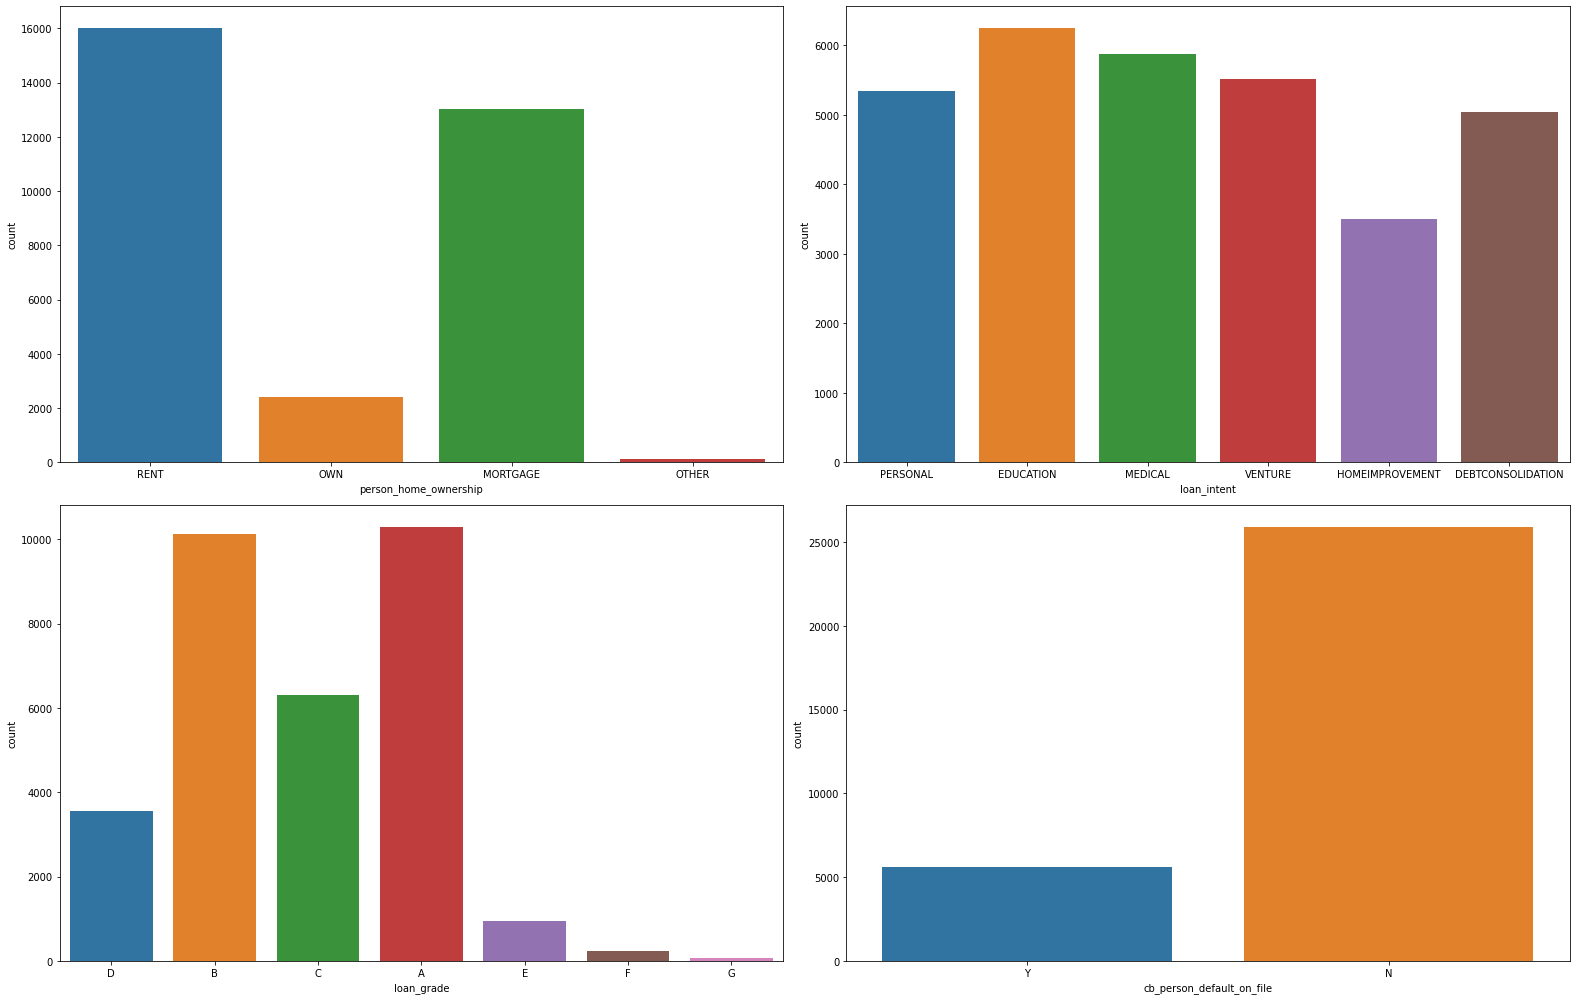

In [ ]:
plt.figure(figsize=(22,14))
features = list_category
for i in range(0, len(features)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df_category[features[i]], data=df_n)
    plt.tight_layout()

Observations:    
1. Most of the customer's residences are still rented
2. The highest purpose of using credit is for Education
3. Highest loan grade for customers is grade A
4. Most of the customers have no history of credit default before

## 4.2 CREDIT DEFAULT CUSTOMER

In [ ]:
df_n[df_n['loan_status'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,6808.0,27.467244,6.264583,20.00,23.000000,26.00,30.00,70.00
person_income,6808.0,49931.711663,36631.560497,4000.00,30000.000000,42000.00,60000.00,703800.00
person_emp_length,6808.0,4.136310,4.127139,0.00,1.000000,3.00,6.00,123.00
loan_amnt,6808.0,11026.417450,7161.607784,900.00,5000.000000,10000.00,15000.00,35000.00
loan_int_rate,6808.0,12.940725,3.165937,5.42,11.039867,13.11,15.31,23.22
loan_status,6808.0,1.000000,0.000000,1.00,1.000000,1.00,1.00,1.00
loan_percent_income,6808.0,0.246688,0.132204,0.01,0.140000,0.24,0.34,0.78
cb_person_cred_hist_length,6808.0,5.678026,4.101551,2.00,3.000000,4.00,8.00,30.00


Observations:    
1. The average income of credit default customers is 49,094 per year
2. The average credit default customers have worked for 4 years
3. The average credit amount of credit default customers is 10,857
4. The average interest rate for credit default customers is 12% per year
5. The average credit amount of credit default customer is 24% of customer income per year
6. The average credit default customer has a credit history that has been running for 5 months
 


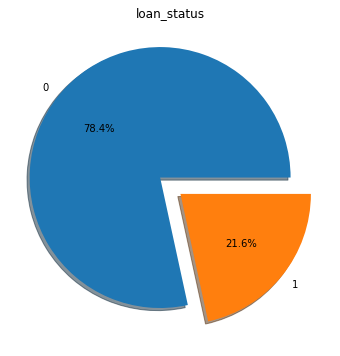

In [ ]:
f,ax=plt.subplots(figsize=(8,6))
df_n['loan_status'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
ax.set_title('loan_status')
ax.set_ylabel('')
plt.show()

Observations:    
21.8% or 7089 credit is default 

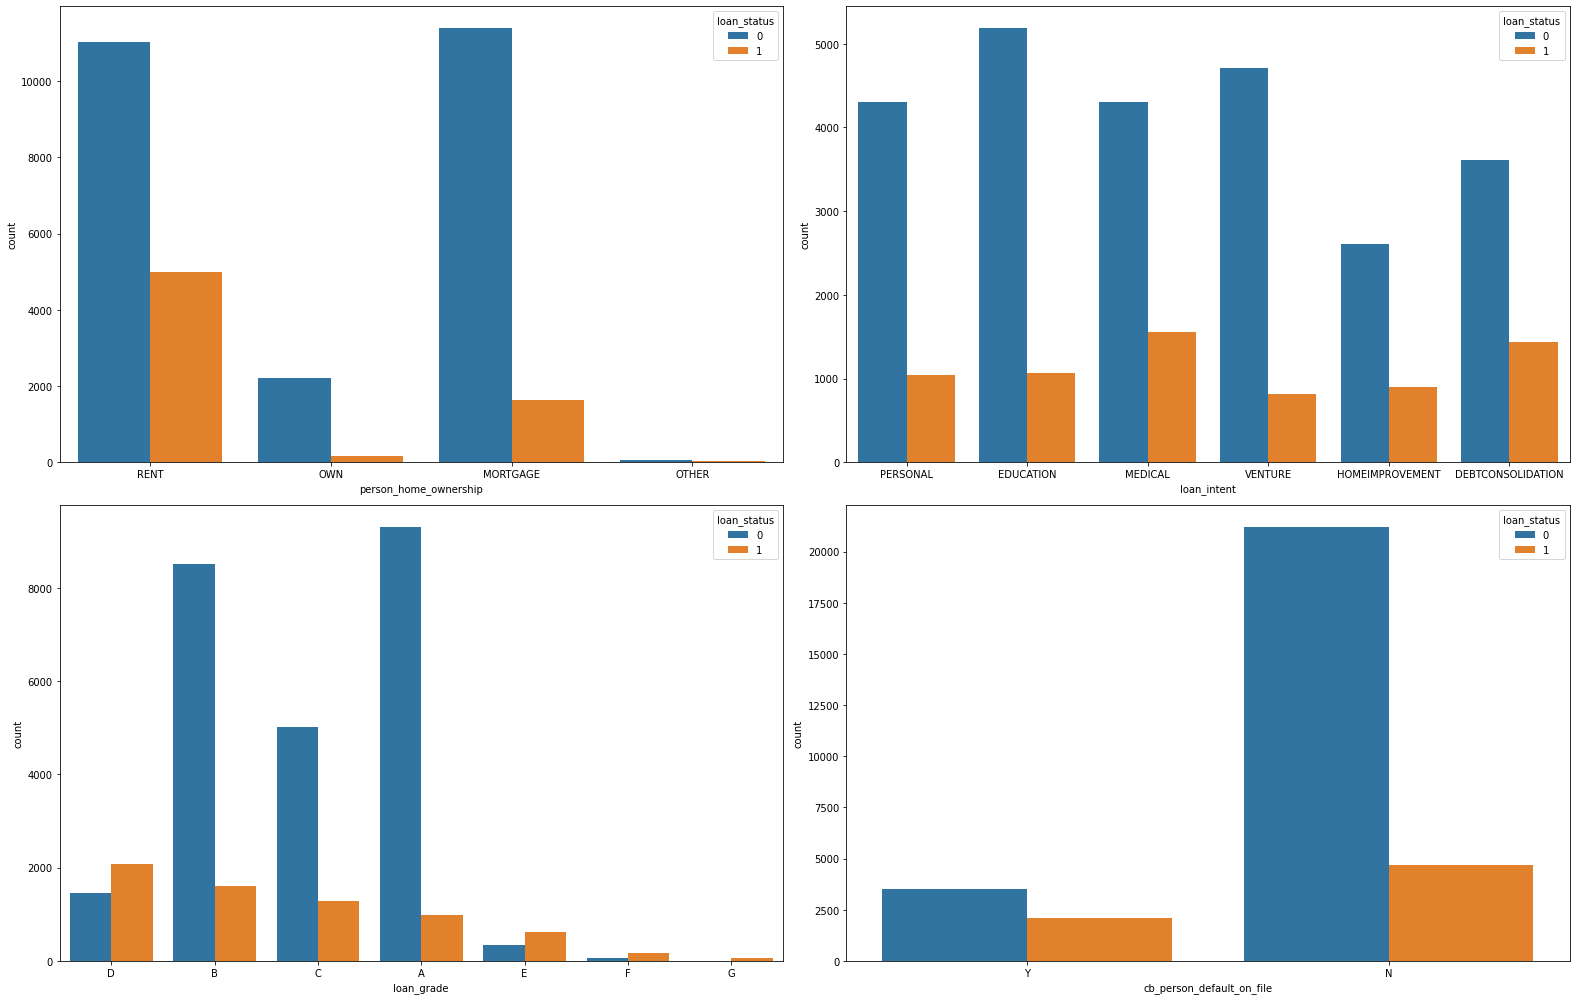

In [ ]:
plt.figure(figsize=(22,14))
features = list_category
for i in range(0, len(features)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df_n[features[i]], hue="loan_status", data=df_n)
    plt.tight_layout()

Observations:    
1. Credit default customers' residences are still rented
2. The highest purpose of credit default customers is for health and debt consolidation
3. The highest loan grade for credit default customers is grade D
4. Customers who do not have a history of credit default on previous credit tend to be default compared to with those with a default history

In [ ]:
df_eda = df_n[df_n['loan_status'] == 1]
df_eda['person_home_ownership'].value_counts()/df_eda['person_home_ownership'].count()*100

RENT        73.178613
MORTGAGE    23.898355
OWN          2.438308
OTHER        0.484724
Name: person_home_ownership, dtype: float64

In [ ]:
df_eda['loan_intent'].value_counts()/df_eda['loan_intent'].count()

MEDICAL              0.229289
DEBTCONSOLIDATION    0.210781
EDUCATION            0.155846
PERSONAL             0.153349
HOMEIMPROVEMENT      0.131610
VENTURE              0.119125
Name: loan_intent, dtype: float64

In [ ]:
df_eda['loan_grade'].value_counts()/df_eda['loan_grade'].count()

D    0.306551
B    0.237368
C    0.188014
A    0.144683
E    0.089747
F    0.024383
G    0.009254
Name: loan_grade, dtype: float64

In [ ]:
df_eda['cb_person_default_on_file'].value_counts()/df_eda['person_home_ownership'].count()

N    0.68963
Y    0.31037
Name: cb_person_default_on_file, dtype: float64

# 5. DATA PREPROCESSING

## 5.1 ABNORMAL DATA HANDLING

In the dataset there are several abnormal data such as:
1. The maximum value in the person_age feature (age > 100 years) and person_emp_length feature (work experience > 100 years) is too far from the average value.
2. Age > 64 years or exceeding the maximum productive age assumption at 64 years of age.
3. Work experience > 49 years
4. Age starting work <15 year or > 64 years

In [ ]:
# Add start_age_working feature
df_n['start_age_working'] = df_n['person_age'] - df_n['person_emp_length']

# Count abnormal data
abnormal_data =  df_n[(df_n['person_age'] > 64) | (df_n['person_emp_length'] > 49) | (df_n['start_age_working'] < 15) | (df_n['start_age_working'] > 63) ]
print(abnormal_data.shape)
print(abnormal_data.shape[0]/df_n.shape[0]*100)

(47, 13)
0.1490691109771956


Abnormal data will be dropped because it has no significant effect on the dataset, because it only has a value of 0.14% of the dataset

In [ ]:
df_n.drop(df_n[(df_n['person_age'] > 64) | (df_n['person_emp_length'] > 49) | (df_n['start_age_working'] < 15) | (df_n['start_age_working'] > 63)  ].index, inplace=True)
df_n.shape

(31482, 13)

In [ ]:
df_n.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,31482.0,27.689791,6.040214,20.00,23.00,26.000000,30.00,64.00
person_income,31482.0,66495.833969,52752.887226,4000.00,39405.00,56000.000000,80000.00,2039784.00
person_emp_length,31482.0,4.782002,4.029043,0.00,2.00,4.000000,7.00,38.00
loan_amnt,31482.0,9660.510768,6330.168508,500.00,5000.00,8000.000000,12500.00,35000.00
loan_int_rate,31482.0,11.044687,3.071780,5.42,8.49,11.039867,13.16,23.22
loan_status,31482.0,0.215933,0.411475,0.00,0.00,0.000000,0.00,1.00
loan_percent_income,31482.0,0.169625,0.106271,0.00,0.09,0.150000,0.23,0.83
cb_person_cred_hist_length,31482.0,5.792326,4.009654,2.00,3.00,4.000000,8.00,30.00
start_age_working,31482.0,22.907789,6.643311,15.00,18.00,22.000000,26.00,63.00


## 5.2 ENCODING CATEGORICAL FEATURE

In [ ]:
# One Hot Encoding categorical feature with >2 values :  
df_n = df_n.join(pd.get_dummies(df_n['person_home_ownership'], prefix = 'ownership'))
df_n = df_n.join(pd.get_dummies(df_n['loan_intent'], prefix = 'loan'))

# Rank Encoding for  loan_grade feature (1 - 7 = small - high risk):  
df_n['loan_grade'] = [1 if x == 'A' else 
                       (2 if x == 'B' else 
                           (3 if x == 'C' else
                              (4 if x == 'D' else 
                                 (5 if x == 'E' else 
                                   (6 if x == 'F' else 7))))) for x in df_n['loan_grade']]

# Label Encoding for feature with 2 values :  
df_n['cb_person_default_on_file'] = [1 if x == 'Y' else  0 for x in df_n['cb_person_default_on_file']]

## 5.3 STRATIFIED SAMPLING

In [ ]:
df_fix = df_n.drop(['person_home_ownership','loan_intent'], axis=1)
train,test = train_test_split(df_fix, test_size=0.3, stratify=df_fix.loan_status, random_state = 42)
print("Training data",train.shape[0], "or", round(train.shape[0]/df_fix.shape[0]*100),'% from total data')
print("Test data",test.shape[0], "or", round(test.shape[0]/df_fix.shape[0]*100),'% from total data')

Training data 22037 or 70 % from total data
Test data 9445 or 30 % from total data


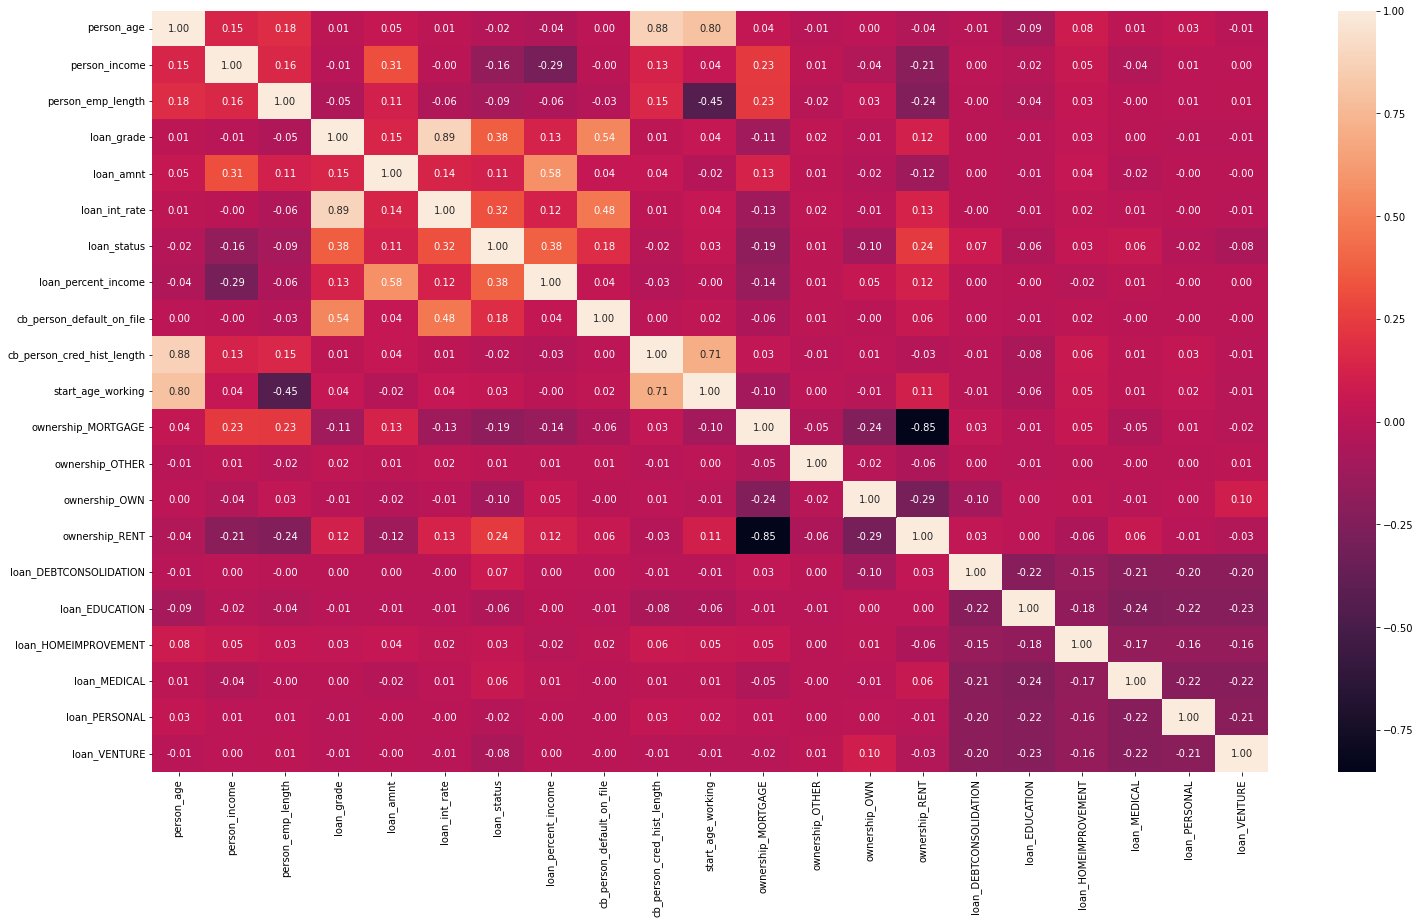

In [ ]:
# correlation heatmap
plt.figure(figsize=(25,14))
correlation = df_fix.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Observations:    
1. The person_age feature, the history feature cb_person_cred_hist_length and the start_age_working feature are highly correlated with each other.
2. There are no features that have a high correlation with the loan_status feature as target feature, so there is no multicollinearity between features with respect to the target feature

## 5.4 BALANCING DATA WITH SMOTE

In [ ]:
X_train_smote = train.drop('loan_status', axis=1)
y_train_smote = train['loan_status']

X_test_smote = test.drop('loan_status', axis=1)
y_test_smote = test['loan_status']

X_resampled_train_smt, y_resampled_train_smt = SMOTE(random_state=42).fit_resample(X_train_smote, y_train_smote)

print("Training data before smote =",train.shape[0])
print("Training data after smote =",X_resampled_train_smt.shape[0])
print('\nBalance of positive and negative classes (%):')
y_resampled_train_smt.value_counts(normalize=True) * 100

Training data before smote = 22037
Training data after smote = 34556

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: loan_status, dtype: float64

# 6. MODELING

## 6.1 BASELINE MODEL

### 6.1.1 Logistic Regression

In [ ]:
df_baseline_lr = LogisticRegression(random_state=42)
df_baseline_lr.fit(X_resampled_train_smt,y_resampled_train_smt)
y_pred_df_baseline_lr_train = df_baseline_lr.predict(X_train_smote)
y_pred_df_baseline_lr = df_baseline_lr.predict(X_test_smote)
print('f1_score Training Model',f1_score(y_train_smote, y_pred_df_baseline_lr_train))
print('f1_score Testing Model',f1_score(y_test_smote, y_pred_df_baseline_lr))

f1_score Training Model 0.5219014792474508
f1_score Testing Model 0.5217244863590434


### 6.1.2 Decision Tree Classifier

In [ ]:
df_baseline_dt = DecisionTreeClassifier(random_state=42)
df_baseline_dt.fit(X_resampled_train_smt,y_resampled_train_smt)
y_pred_df_baseline_dt_train = df_baseline_dt.predict(X_train_smote)
y_pred_df_baseline_dt = df_baseline_dt.predict(X_test_smote)
print('f1_score Training Model',f1_score(y_train_smote, y_pred_df_baseline_dt_train))
print('f1_score Testing Model',f1_score(y_test_smote, y_pred_df_baseline_dt))

f1_score Training Model 1.0
f1_score Testing Model 0.7288615965989609


### 6.1.3 Random Forest Classifier

In [ ]:
df_baseline_rf = RandomForestClassifier(random_state=42)
df_baseline_rf.fit(X_resampled_train_smt,y_resampled_train_smt)
y_pred_df_baseline_rf_train = df_baseline_rf.predict(X_train_smote)
y_pred_df_baseline_rf = df_baseline_rf.predict(X_test_smote)
print('f1_score Training Model',f1_score(y_train_smote, y_pred_df_baseline_rf_train))
print('f1_score Testing Model',f1_score(y_test_smote, y_pred_df_baseline_rf))

f1_score Training Model 1.0
f1_score Testing Model 0.8166435506241332


### 6.1.4 Baseline Model Conclusion

In [ ]:
results_baseline={}
results_baseline["Logistic Regression"]=f1_score(y_test_smote, y_pred_df_baseline_lr)
results_baseline["Decision Tree Classification"]=f1_score(y_test_smote, y_pred_df_baseline_dt)
results_baseline["Random Forest Classification"]=f1_score(y_test_smote, y_pred_df_baseline_rf)
results_baseline = pd.DataFrame.from_dict(results_baseline,orient='index')
results_baseline.columns=["f1_score_baseline_model"] 
results_baseline.sort_values(['f1_score_baseline_model'], ascending=False)

,f1_score_baseline_model
Random Forest Classification,0.816644
Decision Tree Classification,0.728862
Logistic Regression,0.521724


Random Forest has the highest f1 score compared to other models, but it needs to be improved by tuning the parameters to get maximum results

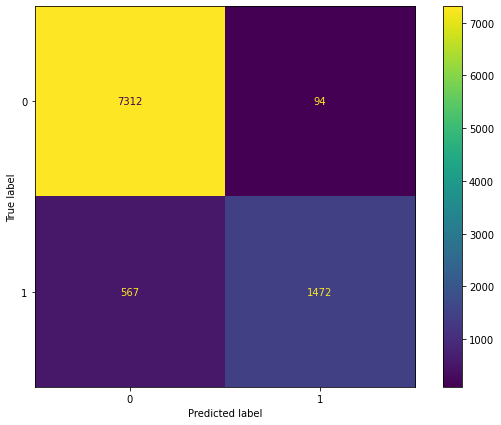

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7406
           1       0.94      0.72      0.82      2039

    accuracy                           0.93      9445
   macro avg       0.93      0.85      0.89      9445
weighted avg       0.93      0.93      0.93      9445



In [ ]:
fig, ax = plt.subplots(figsize=(10,7))

cm = confusion_matrix(y_test_smote, y_pred_df_baseline_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
plt.show()
print(classification_report(y_test_smote, y_pred_df_baseline_rf))

Based on the Random Forest model:
 
    True Positive (TP): the model predicts non credit default customers and it is true that there are 7312 customers.
    True Negative (TN): the model predicts credit default customers and it is true that there are 1472 customers.
    False Positive (FP): the model predicts non credit default customers but it turns out credit default customers that there are 567 customers.
    False Negative (FN): the model predicts credit default customers but it turns out non credit default customers that there are 94 customers.


## 6.2 IMPROVEMENT MODEL

### 6.2.1 Logistic Regression

In [ ]:
%%time
# hyperparameter tuning
df_improvement_lr = LogisticRegression(random_state=42)
parameters = {'penalty' : ['l1', 'l2','elasticnet' 'none'],
            'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'C' : [100,10,1,0.1,0.01]
             }

lr_clf_gridcv = GridSearchCV(df_improvement_lr, parameters, cv=5, scoring='f1')
lr_clf_gridcv.fit(X_resampled_train_smt, y_resampled_train_smt)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.

CPU times: user 5min 22s, sys: 1min 31s, total: 6min 53s
Wall time: 5min 21s


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnetnone'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1')

In [ ]:
# Training data evaluation
lr_cv_result = pd.DataFrame(lr_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
lr_cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
2,"{'C': 100, 'penalty': 'l1', 'solver': 'libline...",0.852071,1
17,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.851589,2
47,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.849580,3
32,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.844589,4
20,"{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}",0.838835,5
...,...,...,...
42,"{'C': 1, 'penalty': 'elasticnetnone', 'solver'...",NaN,71
43,"{'C': 1, 'penalty': 'elasticnetnone', 'solver'...",NaN,72
44,"{'C': 1, 'penalty': 'elasticnetnone', 'solver'...",NaN,73
27,"{'C': 10, 'penalty': 'elasticnetnone', 'solver...",NaN,74


In [ ]:
y_pred_df_improvement_lr = lr_clf_gridcv.best_estimator_.predict(X_test_smote)
print('f1_score',f1_score(y_test_smote, y_pred_df_improvement_lr))

f1_score 0.6239702365134201


### 6.2.2 Decision Tree

In [ ]:
%%time
# hyperparameter tuning
df_improvement_dt = DecisionTreeClassifier(random_state=42)

criterion=["entropy", "gini"]

parameters = {'criterion': criterion,
              'splitter' : ['best', 'random'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'max_depth':(1,2,3,None)
         }
dt_clf_gridcv = GridSearchCV(df_improvement_dt, parameters, cv=3, scoring='f1')
dt_clf_gridcv.fit(X_resampled_train_smt, y_resampled_train_smt)

CPU times: user 25.7 s, sys: 645 ms, total: 26.4 s
Wall time: 26.3 s


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': (1, 2, 3, None),
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='f1')

In [ ]:
# Training data evaluation
dt_cv_result = pd.DataFrame(dt_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
dt_cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
132,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.898904,1
140,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.898723,2
138,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.898723,2
62,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.898700,4
60,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.898513,5
...,...,...,...
82,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.534942,127
84,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.534942,127
86,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.534942,127
10,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.534942,127


In [ ]:
y_pred_df_improvement_dt = dt_clf_gridcv.best_estimator_.predict(X_test_smote)
print('f1_score',f1_score(y_test_smote, y_pred_df_improvement_dt))

f1_score 0.7390130125214829


### 6.2.3 Random Forest

In [ ]:
%%time
# hyperparameter tuning
df_improvement_rf = RandomForestClassifier(random_state=42)
parameters = {
    'criterion' : ['gini', 'entropy'],
    'n_estimators': (50,100,120),
    'bootstrap': [True, False],
    
    
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 4, 6],
    'max_depth':(1,2,3,None)
}
         
rf_clf_gridcv = GridSearchCV(df_improvement_rf, parameters, cv=3, scoring='f1')
rf_clf_gridcv.fit(X_resampled_train_smt, y_resampled_train_smt)

CPU times: user 36min 23s, sys: 4.83 s, total: 36min 28s
Wall time: 36min 30s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': (1, 2, 3, None),
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': (50, 100, 120)},
             scoring='f1')

In [ ]:
# Training data evaluation
rf_cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
rf_cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
409,"{'bootstrap': False, 'criterion': 'entropy', '...",0.928903,1
410,"{'bootstrap': False, 'criterion': 'entropy', '...",0.928864,2
407,"{'bootstrap': False, 'criterion': 'entropy', '...",0.927906,3
418,"{'bootstrap': False, 'criterion': 'entropy', '...",0.927648,4
415,"{'bootstrap': False, 'criterion': 'entropy', '...",0.927648,4
...,...,...,...
330,"{'bootstrap': False, 'criterion': 'entropy', '...",0.744282,424
336,"{'bootstrap': False, 'criterion': 'entropy', '...",0.744282,424
345,"{'bootstrap': False, 'criterion': 'entropy', '...",0.744282,424
342,"{'bootstrap': False, 'criterion': 'entropy', '...",0.744282,424


In [ ]:
rf_clf_gridcv.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [ ]:
y_pred_df_improvement_rf = rf_clf_gridcv.best_estimator_.predict(X_test_smote)
print('f1_score',f1_score(y_test_smote, y_pred_df_improvement_rf))

f1_score 0.8183588317107094


### 6.2.4 Improvement Model Conclusion

In [ ]:
results={}
results["Logistic Regression"]=f1_score(y_test_smote, y_pred_df_baseline_lr)
results["Decision Tree Classification"]= f1_score(y_test_smote, y_pred_df_baseline_dt)
results["Random Forest Classification"]=f1_score(y_test_smote, y_pred_df_baseline_rf)
results = pd.DataFrame.from_dict(results,orient='index')
results.columns=["f1_score_baseline_model"] 
results['f1_score_improvement_model'] = f1_score(y_test_smote, y_pred_df_improvement_lr), f1_score(y_test_smote, y_pred_df_improvement_dt), f1_score(y_test_smote, y_pred_df_improvement_rf)
results.sort_values(['f1_score_improvement_model'], ascending=False)

,f1_score_baseline_model,f1_score_improvement_model
Random Forest Classification,0.816644,0.818359
Decision Tree Classification,0.728862,0.739013
Logistic Regression,0.521724,0.623970


The Random Forest Improvement model has the highest f1 score compared to the baseline model and other improvement models, so the random forest improvement model is used to predict credit default.

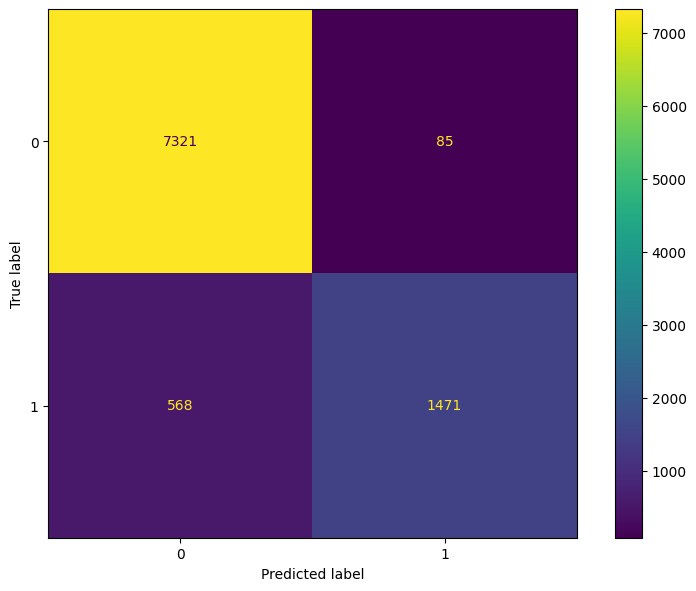

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7406
           1       0.95      0.72      0.82      2039

    accuracy                           0.93      9445
   macro avg       0.94      0.85      0.89      9445
weighted avg       0.93      0.93      0.93      9445



In [ ]:
fig, ax = plt.subplots(figsize=(10,7))

cm = confusion_matrix(y_test_smote, y_pred_df_improvement_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
plt.show()
print(classification_report(y_test_smote, y_pred_df_improvement_rf))

Based on the Random Forest improvement model:
 
    True Positive (TP): the model predicts non credit default customers and it is true that there are 7321 customers.
    True Negative (TN): the model predicts credit default customers and it is true that there are 1471 customers.
    False Positive (FP): the model predicts non credit default customers but it turns out credit default customers that there are 568 customers.
    False Negative (FN): the model predicts credit default customers but it turns out non credit default customers that there are 85 customers.

## 6.3 MODEL INTERPRETATION

### 6.3.1 Feature Importance

                      Variable  Importance
6          loan_percent_income   16.468261
5                loan_int_rate   11.954882
1                person_income   10.635530
3                   loan_grade    6.819295
10          ownership_MORTGAGE    6.544269
4                    loan_amnt    5.123517
13              ownership_RENT    4.667840
2            person_emp_length    4.341827
12               ownership_OWN    4.229853
19                loan_VENTURE    4.182096
15              loan_EDUCATION    4.111617
18               loan_PERSONAL    3.595047
9            start_age_working    3.395992
17                loan_MEDICAL    2.958879
14      loan_DEBTCONSOLIDATION    2.827971
0                   person_age    2.655919
16        loan_HOMEIMPROVEMENT    2.422316
8   cb_person_cred_hist_length    2.125120
7    cb_person_default_on_file    0.748653
11             ownership_OTHER    0.191117


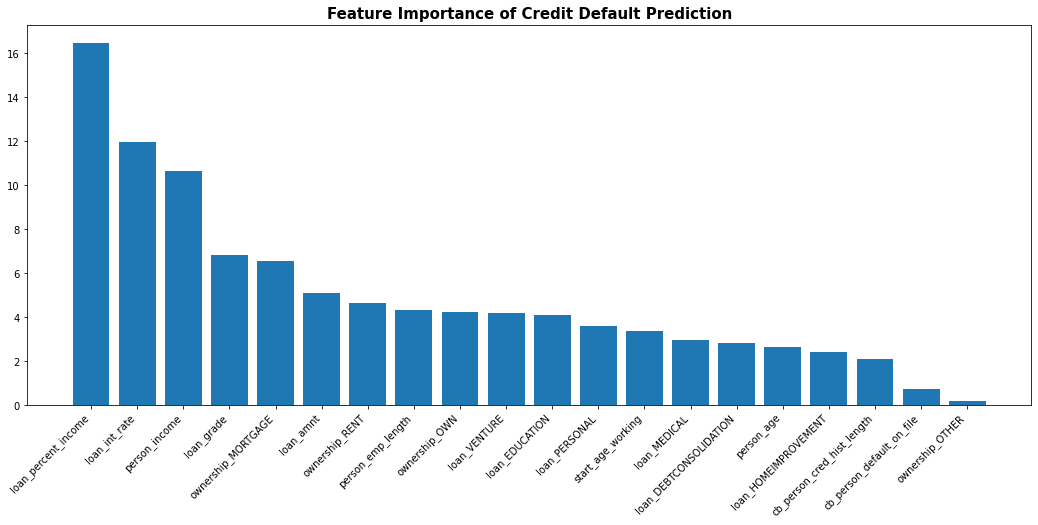

In [ ]:
feature_importance = pd.DataFrame({'Variable':X_resampled_train_smt.columns,
                      'Importance':rf_clf_gridcv.best_estimator_.feature_importances_*100}).sort_values('Importance', ascending=False)
fig, ax = plt.subplots(figsize=(18,7))
ax.bar(feature_importance['Variable'], feature_importance['Importance'])
plt.xticks(rotation=45, ha='right')
ax.set_title('Feature Importance of Credit Default Prediction', fontsize=15, fontweight='bold')
plt.show
print(feature_importance)

Observation:
4 most important features in the credit default prediction model are:
 - loan_percent_income   
 - loan_int_rate
 - person_income   
 - loan_grad



### 6.3.2 Feature Contribution

In [ ]:
from treeinterpreter import treeinterpreter as ti
import waterfall_chart

def create_contrbutions_df(row):
    row_value = X_test_smote.values[[row]]
    prediction, bias, contributions = ti.predict(rf_clf_gridcv.best_estimator_, row_value)
    idxs = np.argsort(contributions[0][:][:,1])
    contrib_df = pd.DataFrame([o for o in zip(X_test_smote.columns[idxs], X_test_smote.iloc[row][idxs], contributions[0][:][idxs,1])])
    pred = contrib_df[2].sum()+bias[0][0]
    print (contrib_df)
    print ("bias :", bias[0][0])
    print ("contributions :", contrib_df[2].sum())
    print ("calculated prediction :", pred)
    print("final model prediction :",rf_clf_gridcv.best_estimator_.predict(X_test_smote.values[[row]])[0])
    plt.rcParams.update({'figure.figsize':(7.5,5), 'figure.dpi':100})
    my_plot=waterfall_chart.plot(contrib_df[0],contrib_df[2],sorted_value= True, rotation_value=90, threshold=0.1,formatting='{:,.3f}')
    

                             0         1         2
0                loan_int_rate      6.54 -0.092493
1                 loan_MEDICAL      1.00 -0.043816
2                   loan_grade      1.00 -0.021724
3                   person_age     25.00 -0.000200
4              ownership_OTHER      0.00  0.000000
5    cb_person_default_on_file      0.00  0.000024
6         loan_HOMEIMPROVEMENT      0.00  0.001756
7       loan_DEBTCONSOLIDATION      0.00  0.001902
8                loan_PERSONAL      0.00  0.003993
9   cb_person_cred_hist_length      2.00  0.004670
10           person_emp_length      1.00  0.006570
11           start_age_working     24.00  0.007645
12              loan_EDUCATION      0.00  0.011709
13                loan_VENTURE      0.00  0.011937
14               ownership_OWN      0.00  0.021719
15                   loan_amnt   9250.00  0.032188
16              ownership_RENT      1.00  0.038748
17          ownership_MORTGAGE      0.00  0.048788
18               person_income 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


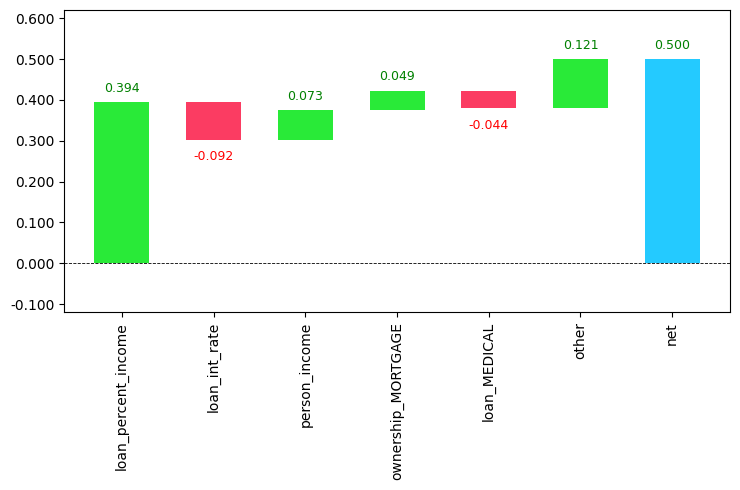

In [ ]:
# Feature contibution on customer number 33 in Testing Data 
create_contrbutions_df(33)

                             0         1         2
0          loan_percent_income      0.06 -0.076548
1         loan_HOMEIMPROVEMENT      1.00 -0.058124
2   cb_person_cred_hist_length     16.00 -0.021929
3    cb_person_default_on_file      1.00 -0.014978
4                   person_age     47.00 -0.001481
5              ownership_OTHER      0.00  0.000032
6            start_age_working     47.00  0.001316
7       loan_DEBTCONSOLIDATION      0.00  0.002245
8                 loan_MEDICAL      0.00  0.006889
9                    loan_amnt   1000.00  0.007947
10              ownership_RENT      1.00  0.015677
11               loan_PERSONAL      0.00  0.017172
12                loan_VENTURE      0.00  0.020795
13               ownership_OWN      0.00  0.027586
14              loan_EDUCATION      0.00  0.028112
15           person_emp_length      0.00  0.045652
16          ownership_MORTGAGE      0.00  0.053505
17               person_income  18000.00  0.106291
18               loan_int_rate 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


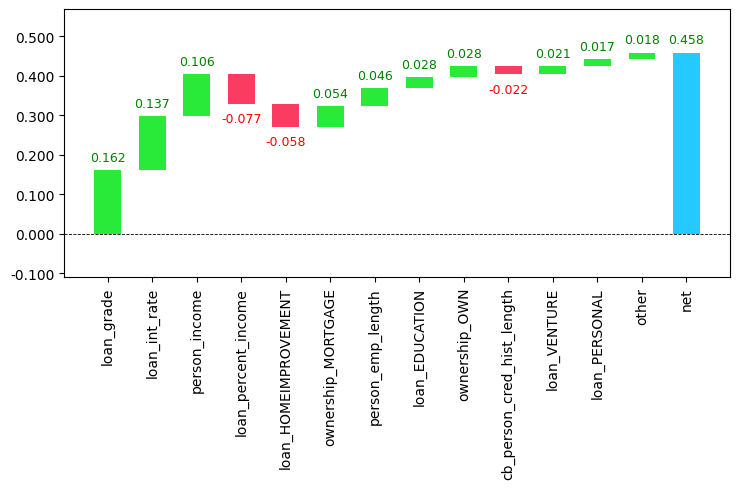

In [ ]:
# Feature contibution on customer number 16 in Testing Data 
create_contrbutions_df(16)

### 6.3.3 Feature Partial Dependence

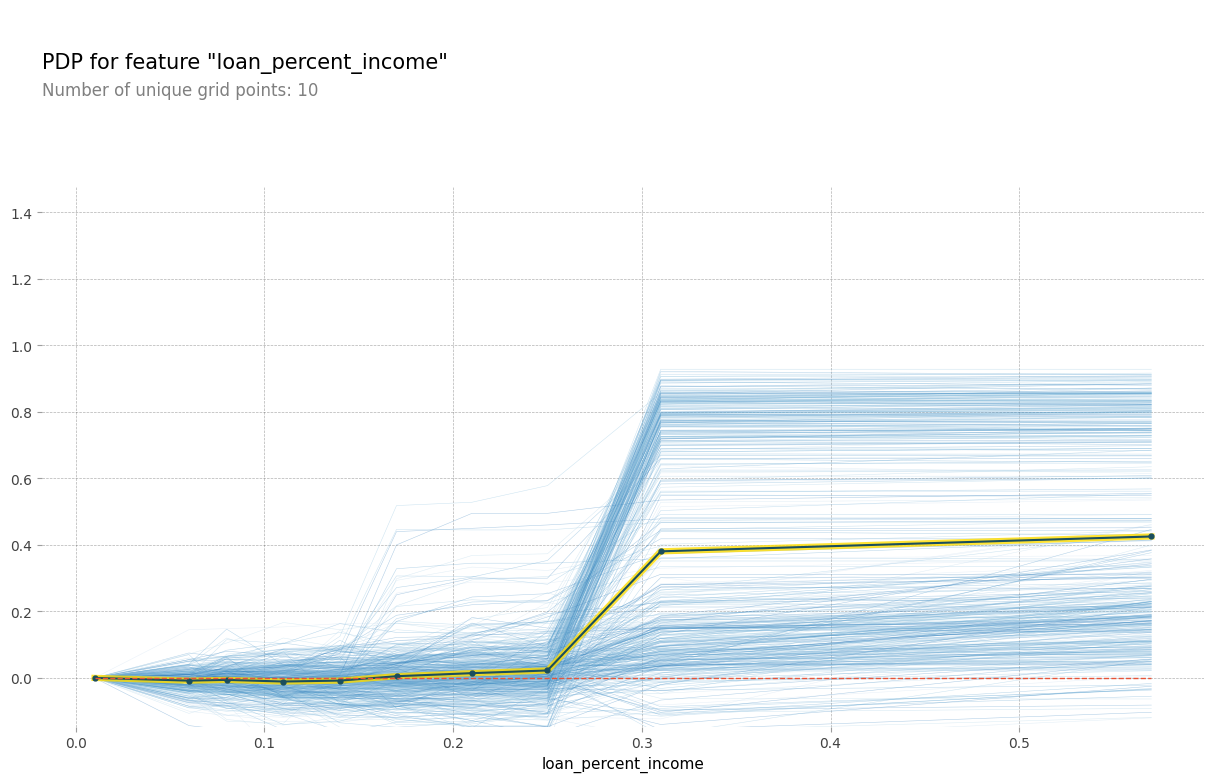

In [ ]:
from pdpbox import pdp
from plotnine import *
from plotnine.data import mpg

# Work on a sample of the data for our visualizations
rand_sample = np.random.permutation(len(X_test_smote))[:500]
df_sample = X_test_smote.iloc[rand_sample]
features = X_test_smote.columns

# Use the pdp library and define a plot_pdp function for our PDP visualization
def plot_pdp(feat):
    feat_name = feat
    p = pdp.pdp_isolate(model = rf_clf_gridcv.best_estimator_, dataset=X_test_smote.iloc[rand_sample], feature = feat, model_features = features)
    return pdp.pdp_plot(p, feat_name, plot_lines=True)

plot_pdp('loan_percent_income')
plt.show()

customers will tend to default when credit/income is in the position of 24% and above 

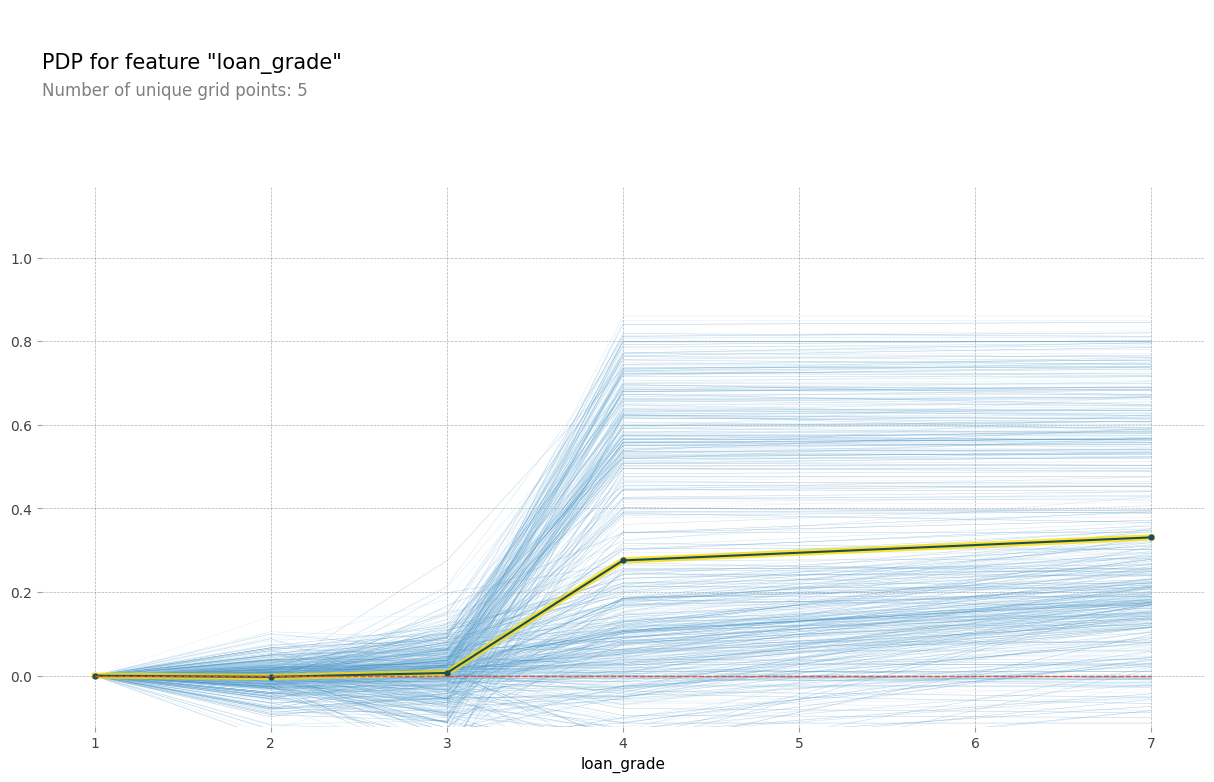

In [ ]:
plot_pdp('loan_grade')
plt.show()

customers will tend to default when loan grades D,E,F,G

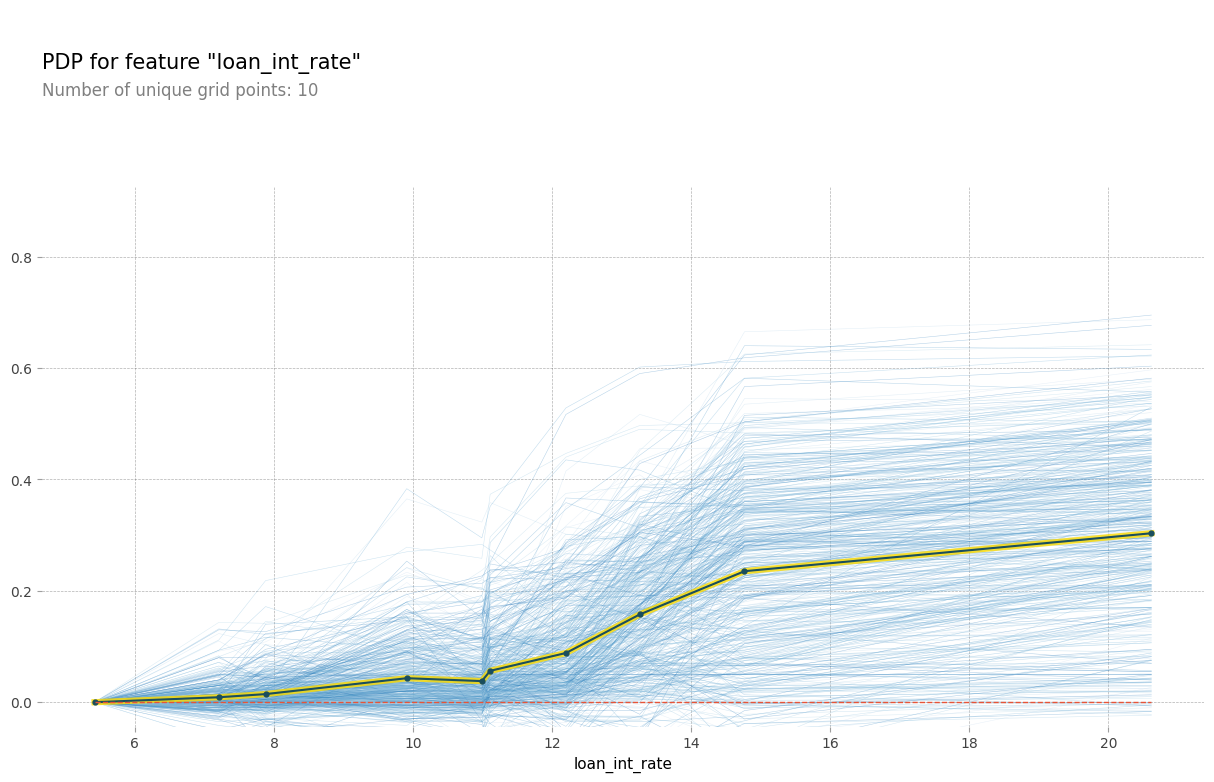

In [ ]:
plot_pdp('loan_int_rate')
plt.show()

customers will tend to default when interest is in the position of 11%/year and above

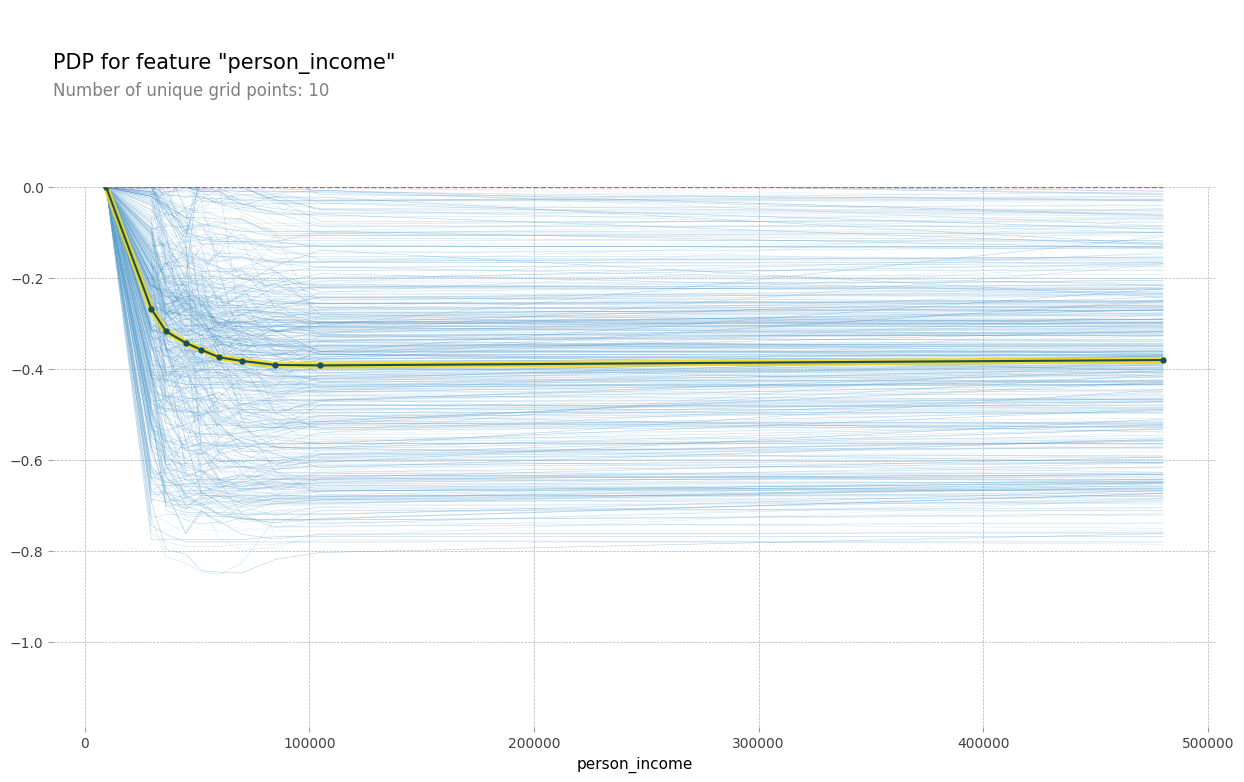

In [ ]:
plot_pdp('person_income')
plt.show()

the greater the customer's income, they will not tend to default

# 7. BUSINESS RECOMMENDATION

1. Bank can focus on 3 important features when analyzing credit, these features are: 
 
 a. **loan/income**: Bank must be more careful with customers who have a credit/income value >= 24%
 
 b. **interest**: Bank must be more careful with customers who have interest rates >= 11%
 
 c. **loangrade**: Bank must be more careful with customers who have loan grades D, E, F and G

2. The Recall score of model is 72%, meaning that out of 10 customers who are default, there are 3 customers that model failed to predict. In other words, the effectiveness of the Bank's loss reserves which is formed to be able to cover credit default reaches 72% so that financial allocation arrangements become more measurable.

3. Banks can carry out risk mitigation on loss reserves formed by sharing risks with 3rd parties, namely Insurance Institutions or Credit Guarantee Institutions for the criteria of customers who tend to default.